## Abbildung 1: Vergleich der Publikationen von und über Ehrlich, Marx, Weber und Luhmann. 

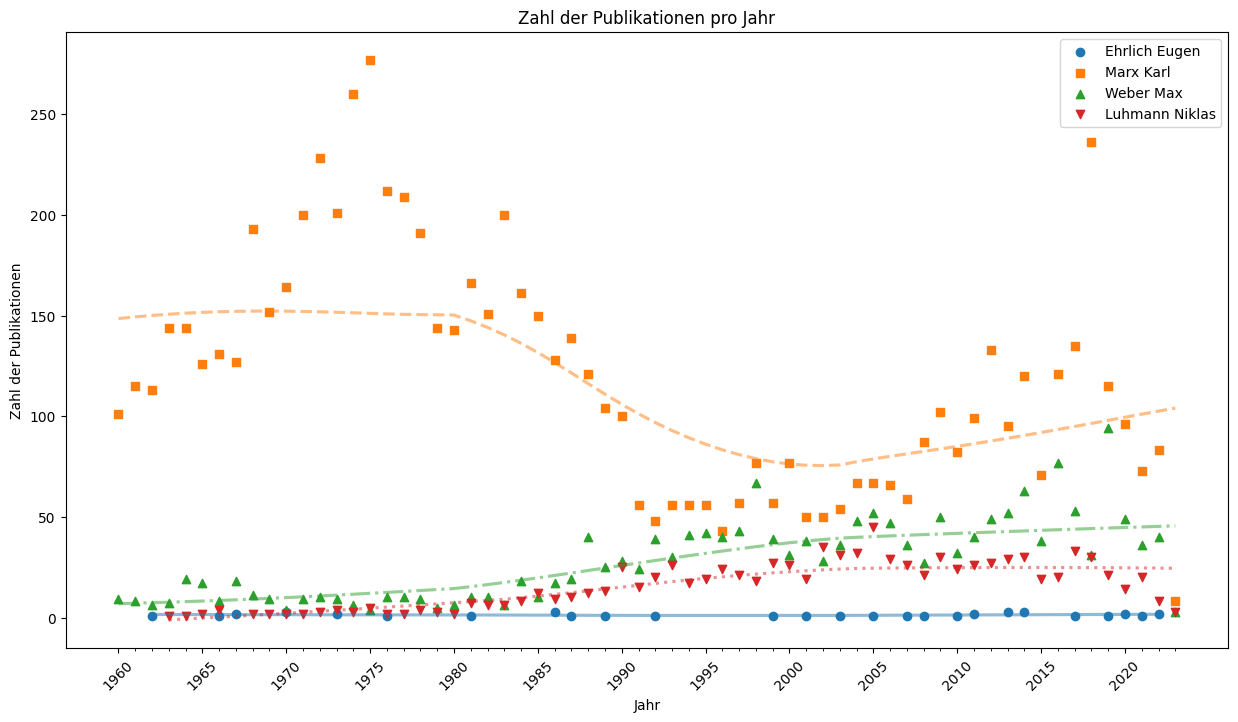

In [1]:
from scripts.dnb_data import compare_persons, plot_comparison
persons = ['Ehrlich Eugen', 'Marx Karl', 'Weber Max', 'Luhmann Niklas']
yearly_counts = compare_persons(persons, 1960, 2023)
plot_comparison(yearly_counts, lang="de", filename="01-dnb-ehrlich-marx-weber-luhmann.png")

## Abbildung 2: „Eugen Ehrlich“ im Google NGram Viewer, Korpus Englisch (2019)

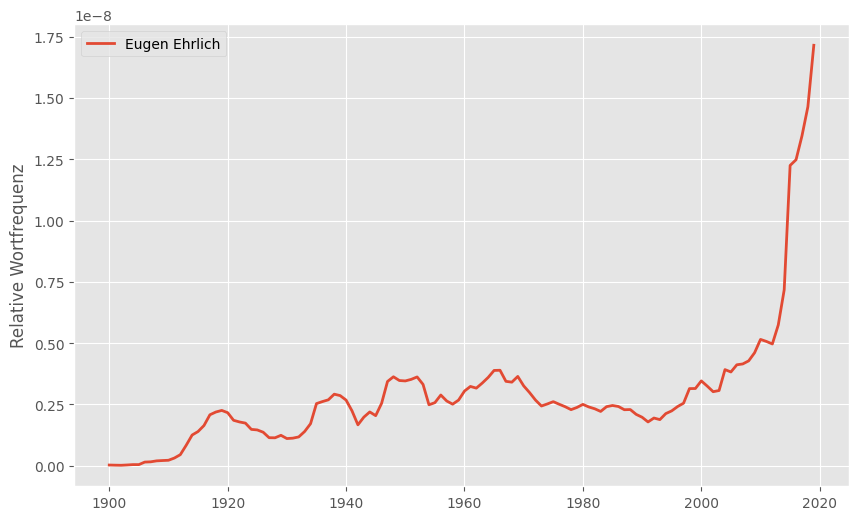

In [3]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/02-google-ngram-ehrlich-en-1900-2019.png",
     content='Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')

## Abbildung 3 „Eugen Ehrlich“ im Google NGram Viewer, Korpus German (2019)

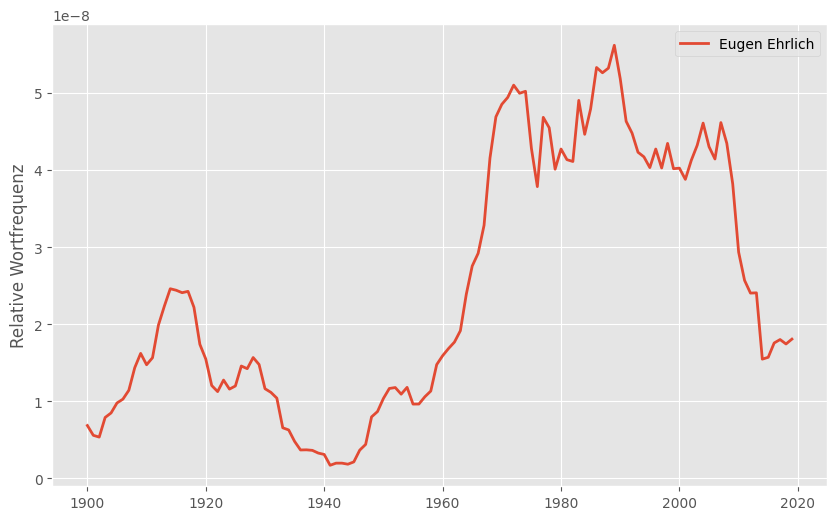

In [4]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/03-google-ngram-ehrlich-de-1900-2019.png",
     content='Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Abbildung 4: Rechtssoziologie-Klassiker im Korpus German (2019)

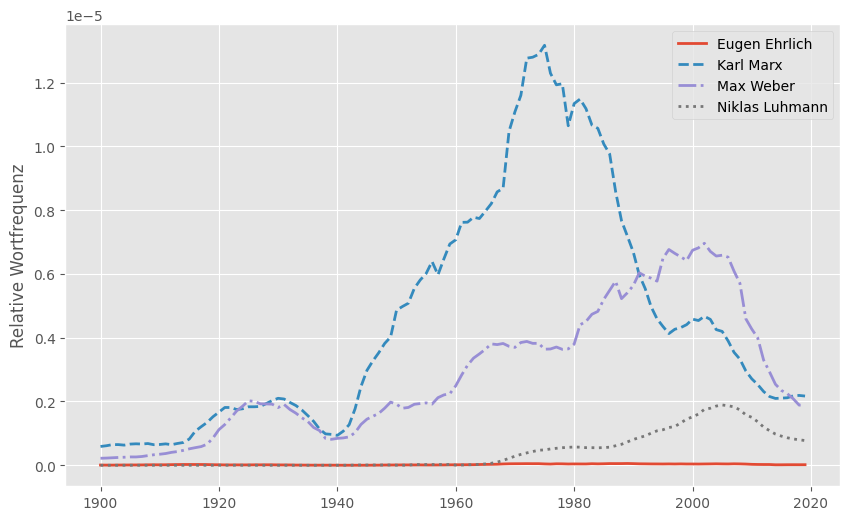

In [5]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/04-google-ngram-marx-ehrlich-weber-luhmann-de-1900-2019.png",
     content='Eugen Ehrlich,Karl Marx,Max Weber,Niklas Luhmann',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Abbildung 5: Rechtssoziologie-Klassiker im Korpus English (2019)

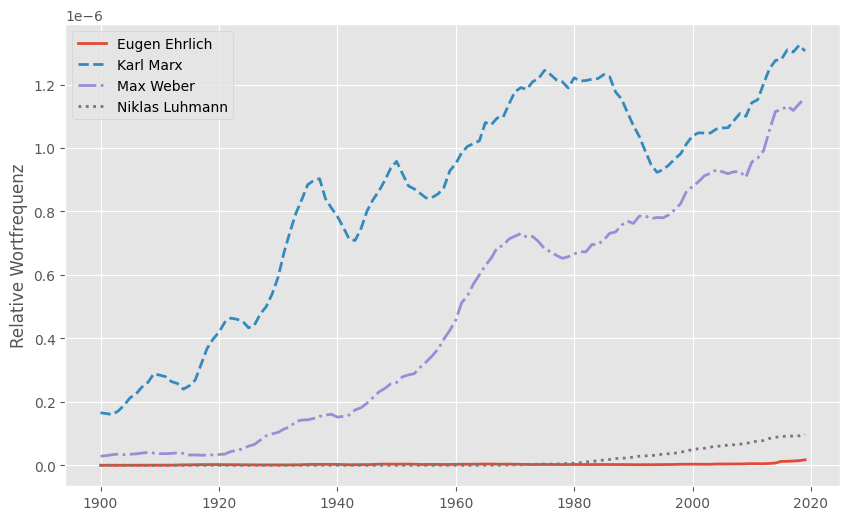

In [6]:
from lib.google_ngram import plot
plot(ylabel="Relative Wortfrequenz",
     file="docs/05-google-ngram-marx-ehrlich-weber-luhmann-en-1900-2019.png",
     content='Eugen Ehrlich,Karl Marx,Max Weber,Niklas Luhmann',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')

## Abbildung 6: Zitierungen Ehrlichs, aggregiert nach Zeitschrift/Verlag 

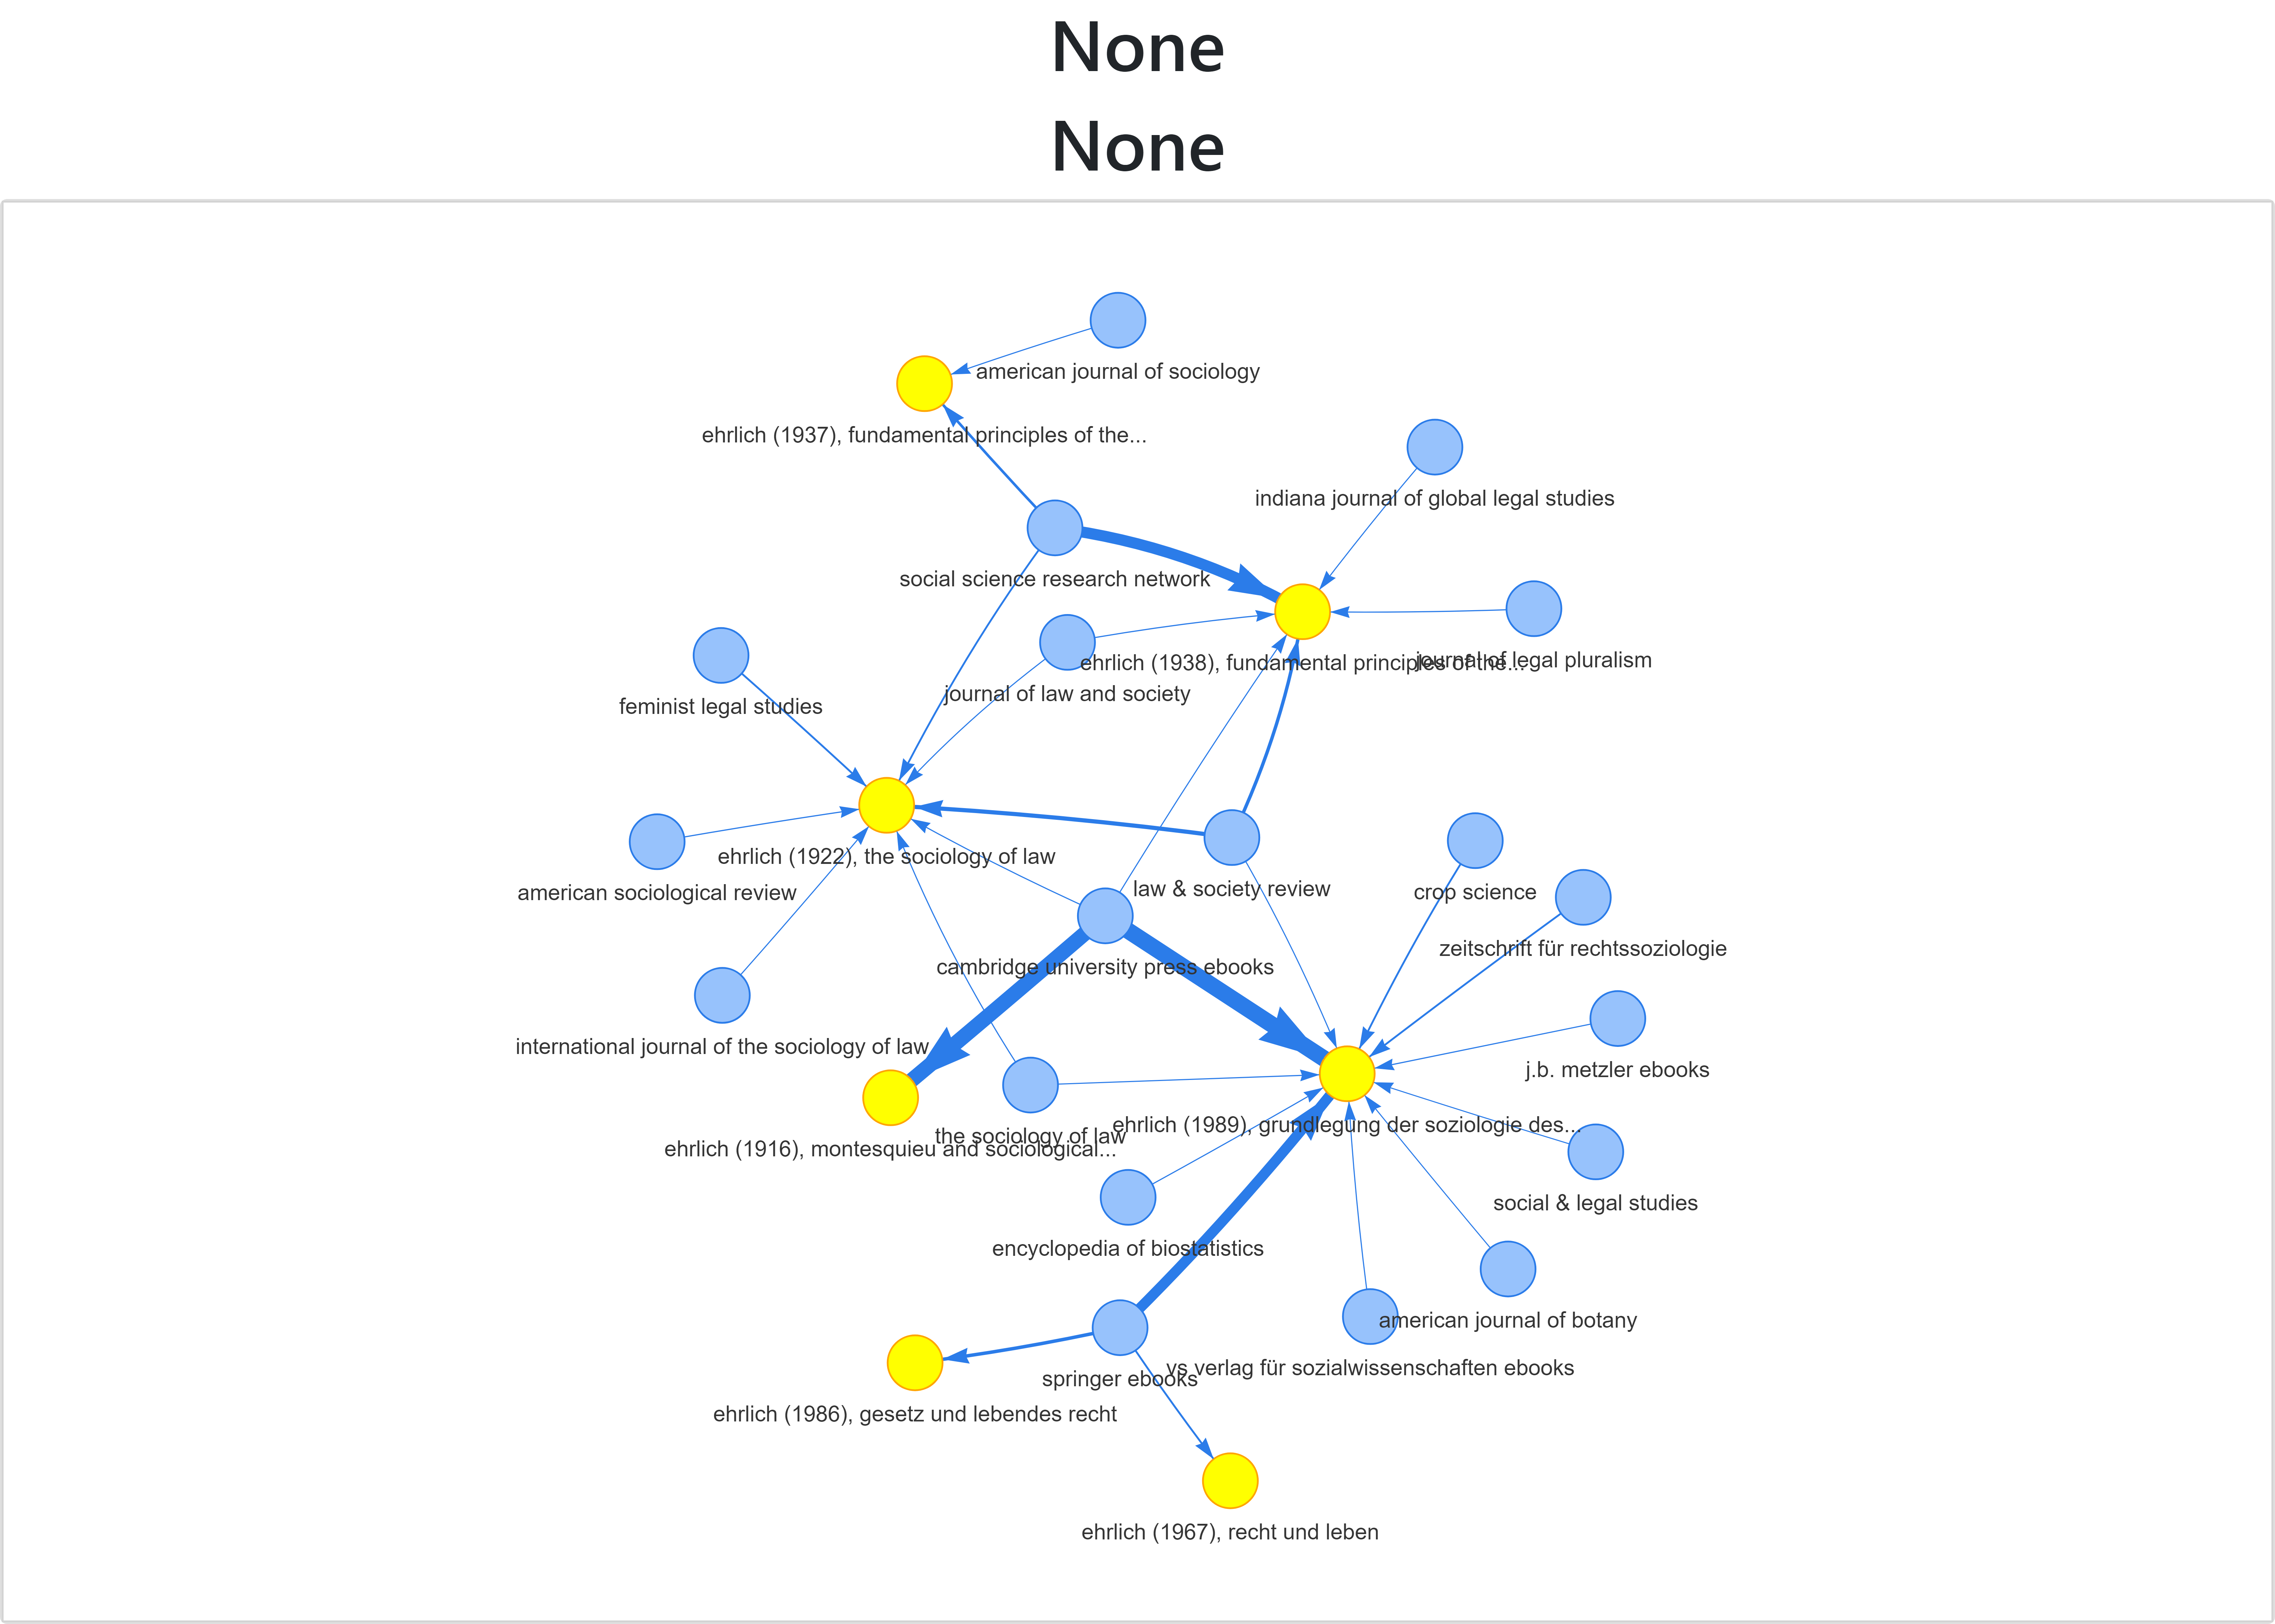

In [7]:
query = """
MATCH (a1:Author)-[r1:CREATOR_OF]->(w1:Work)<-[r2:CITES]-(w2:Work)-[r3:PUBLISHED_IN]-(v1:Venue)
WHERE a1.display_name = "ehrlich, eugen"
with w1, v1, count(r2) as num_citations
where num_citations > 1
RETURN  v1 AS source_node,
        apoc.create.vRelationship(v1, 'CITATIONS', {value:num_citations}, w1) as rel,
        w1 as target_node
"""
from scripts.utils import get_graph
from scripts.pyvis import create_or_update_network, draw_network

graph = get_graph("ehrlich-openalex")
net = create_or_update_network(graph, query, width="800px", height="800px")
file = "docs/06-venues-citing-ehrlich.html"
draw_network(net, file=file, screenshot=True)

## Abbildung 7: Relative Frequenz rechtssoziologischer Klassiker im ZfRsoz-Korpus

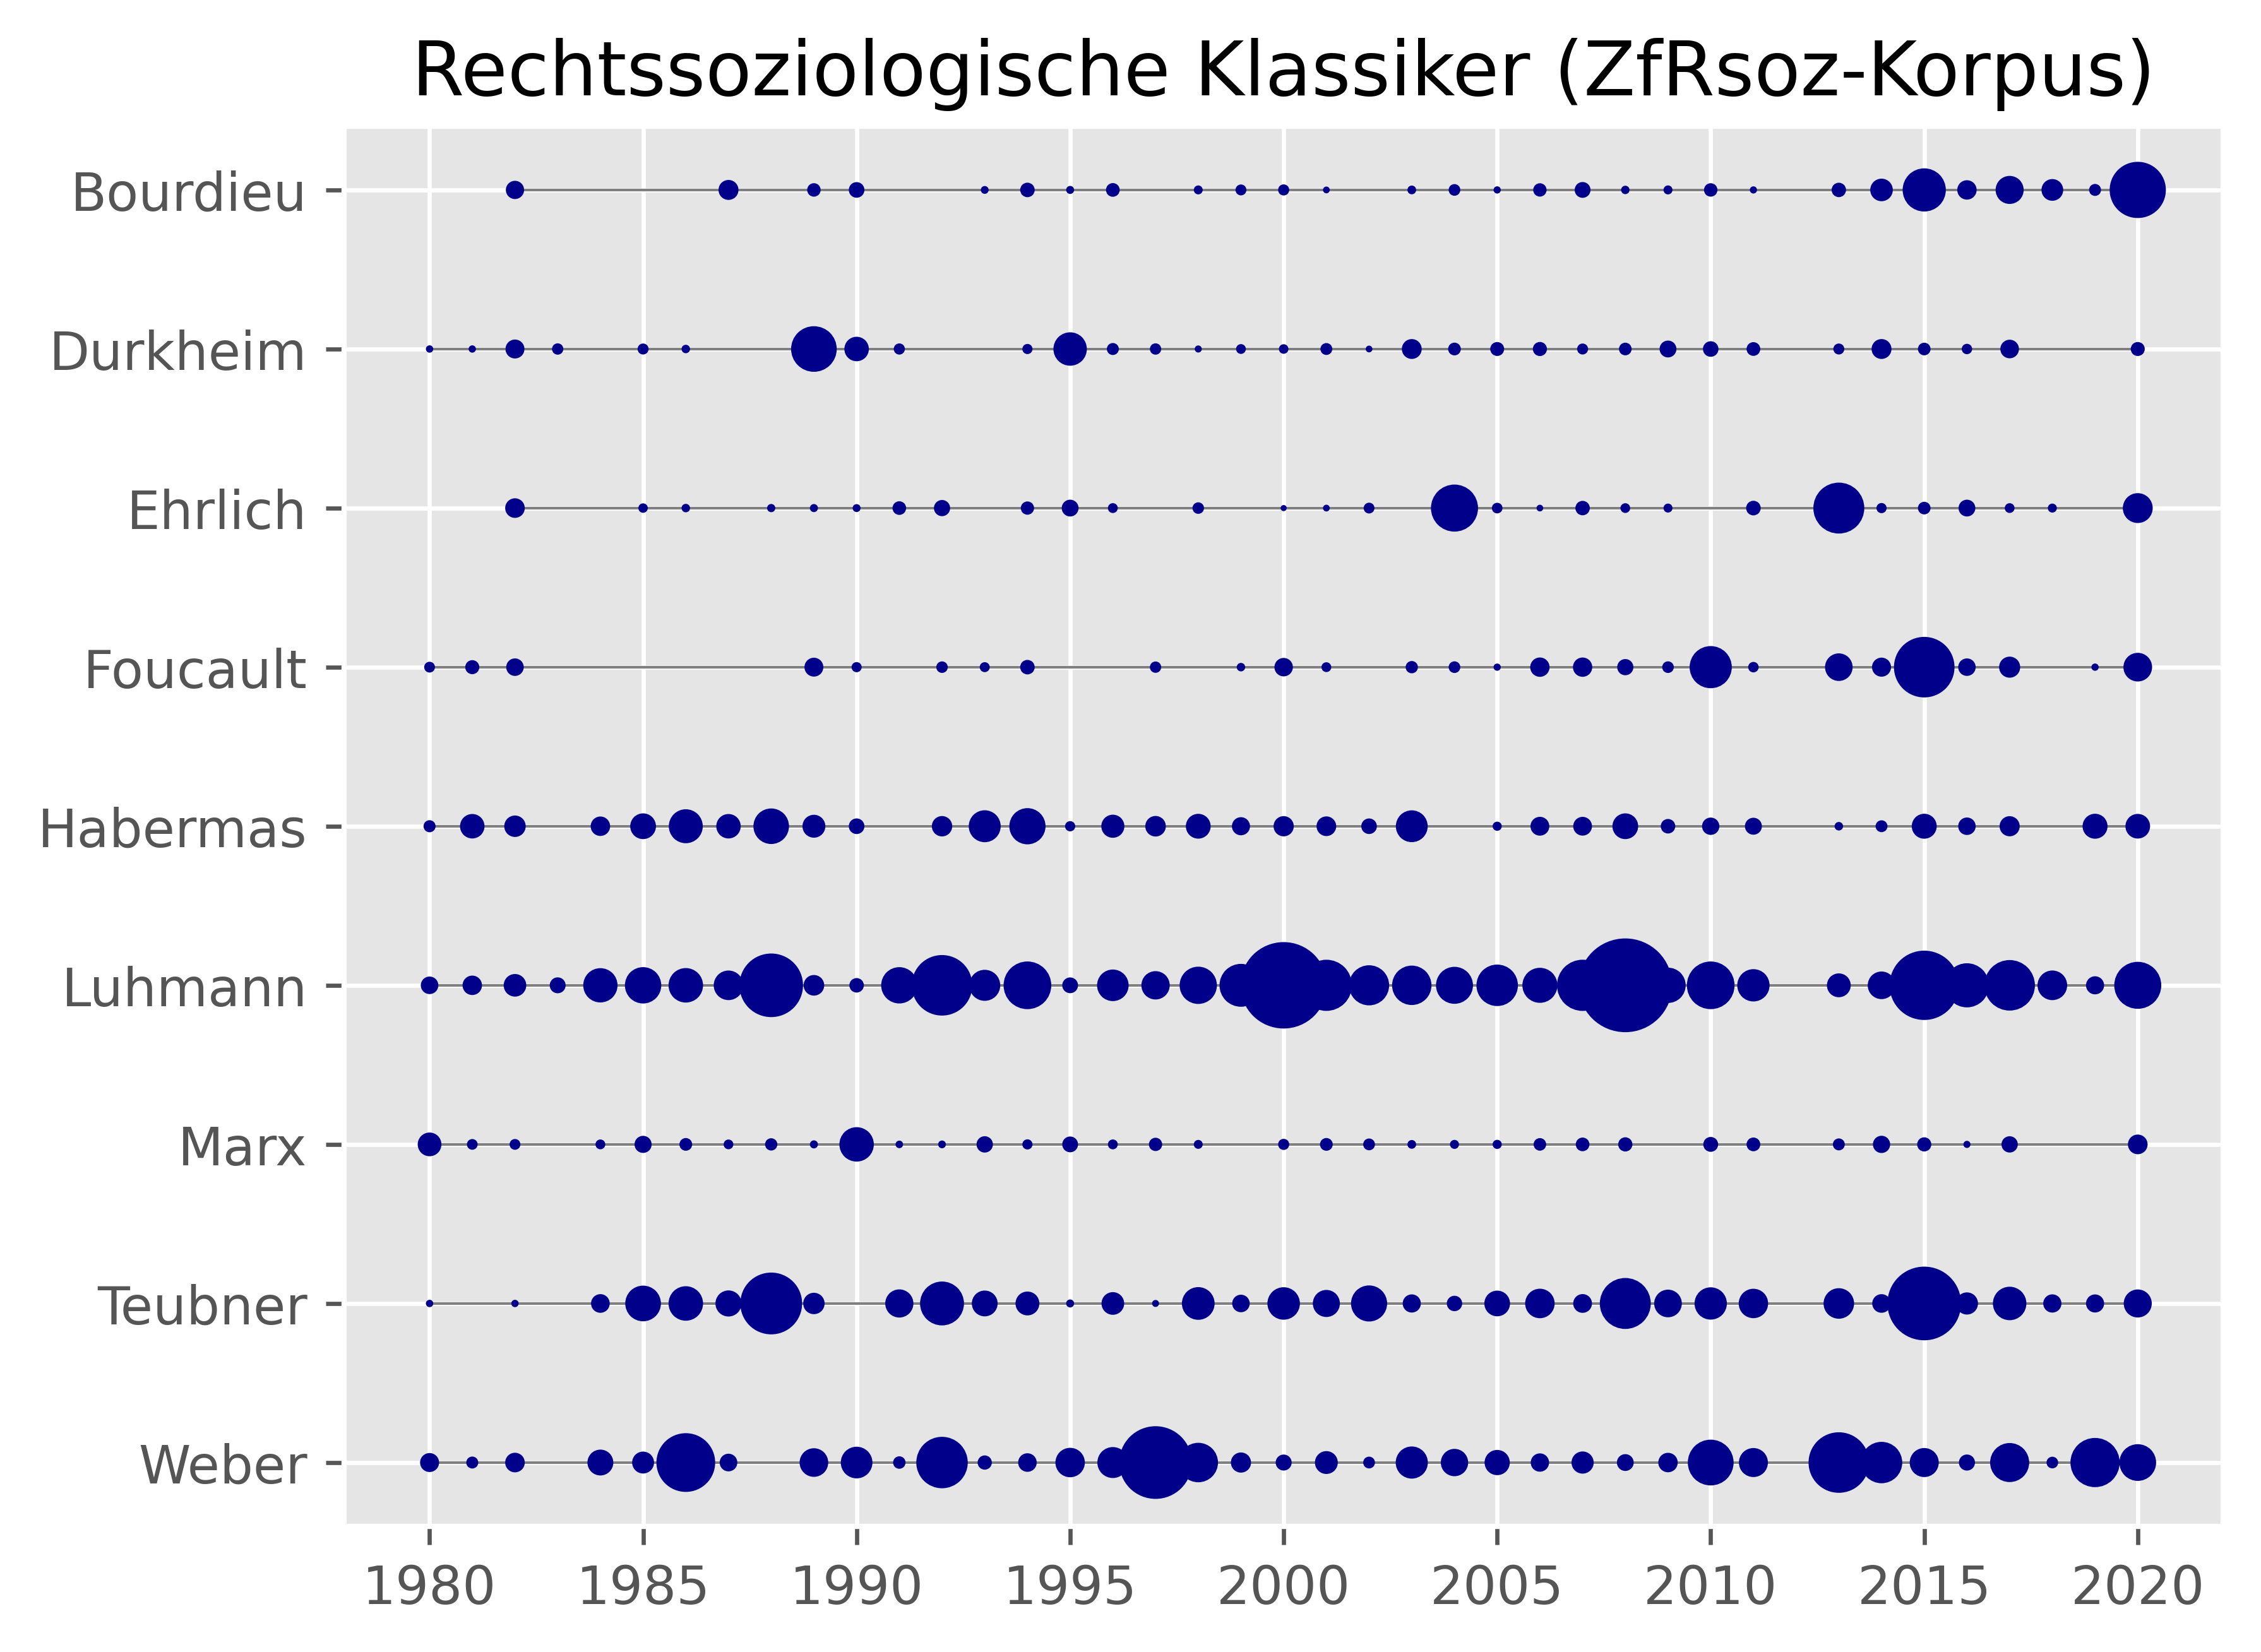

In [8]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("zfrsoz")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
plot_by_year(prepare_data(corpus, search_terms),
             title="Rechtssoziologische Klassiker (ZfRsoz-Korpus)",
             dpi=600, file="docs/07-zfrsoz-socio-legal-classics-ts.png")

## Abbildung 8: Relative Frequenz rechtssoziologischer Klassiker im ZfRsoz-Korpus

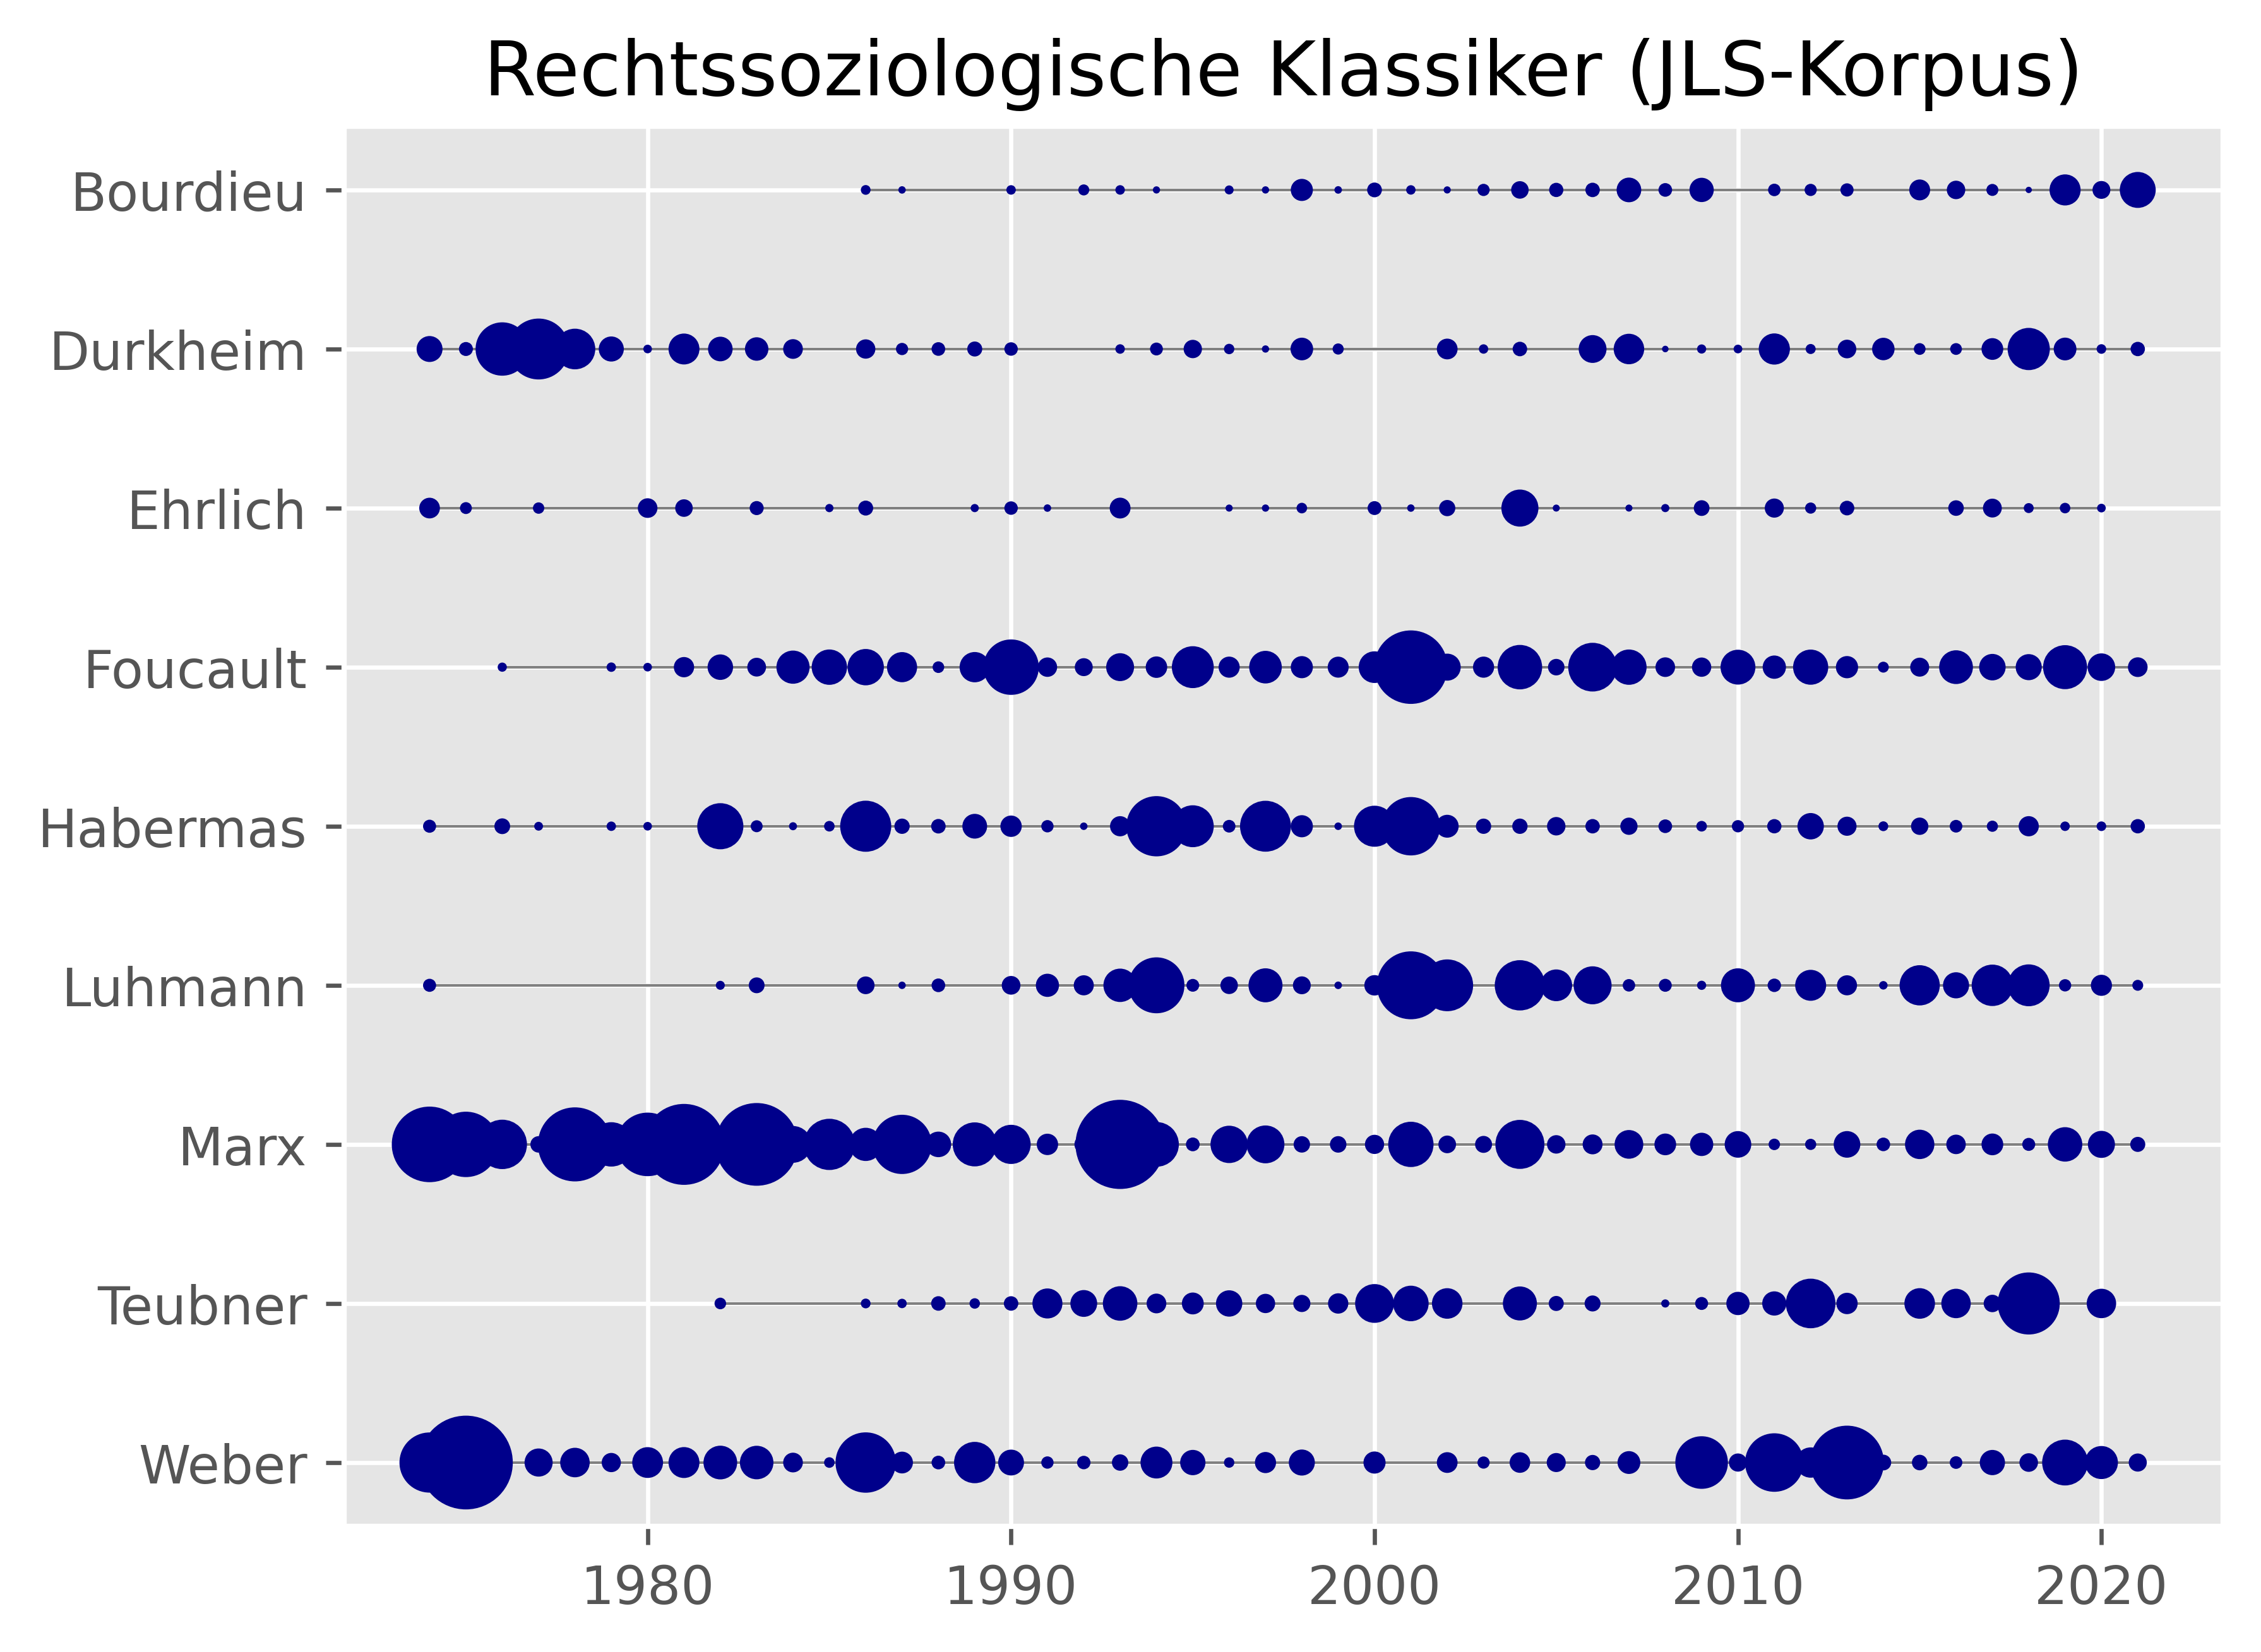

In [9]:
from scripts.utils import create_cached_corpus
from scripts.occurrence_by_year_scatter import prepare_data, plot_by_year
corpus = create_cached_corpus("jls")
search_terms = [r'Bourdieu',r'Durkheim', r'Ehrlich',r'Foucault', r'Habermas',r'Luhmann','Marx','Teubner', 'Weber']
search_terms.reverse()
data = prepare_data(corpus, regex_list=search_terms)
plot_by_year(data,
             title="Rechtssoziologische Klassiker (JLS-Korpus)",
             dpi=600,
             file="docs/08-jls-socio-legal-classics-ts.png")

## Abbildung 9: Nennung von „Ehrlich“ und „lebendem Recht“ im Korpus der Zeitschrift für Rechtssoziologie

Analyzing article corpus:   0%|          | 0/725 [00:00<?, ?it/s]

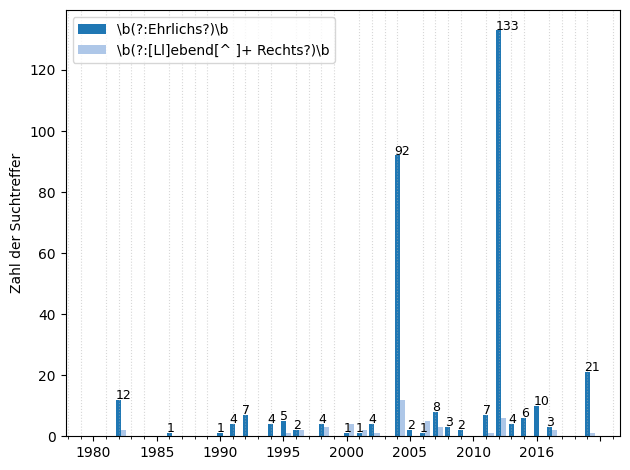

In [2]:
from scripts.utils import create_corpus, get_corpus_dir
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlichs?)\b', r'\b(?:[Ll]ebend[^ ]+ Rechts?)\b']
corpus = create_corpus(get_corpus_dir('FULLTEXTS/ZFRSOZ/zfrsoz-txt'))
corpus = corpus.loc[corpus['author'] != 'Smaus'] # manual correction of false positive
save_occurrences(corpus, regex_list, "data/zfrsoz-articles-occurrences.xlsx")
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer')
plt.savefig('docs/09-zfrsoz-tf-ehrlich', dpi=600, bbox_inches='tight')
plt.show()

## Abbildung 10: Nennungen von „Ehrlich“ und „Living Law“ im Journal of Law and Society

Analyzing article corpus:   0%|          | 0/1650 [00:00<?, ?it/s]

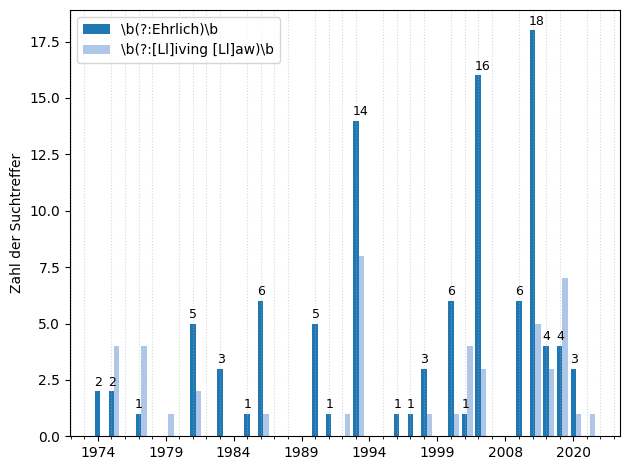

In [1]:
from scripts.utils import create_corpus, get_corpus_dir, DOICache
from scripts.occurrence_by_year import plot_occurrences, save_occurrences
regex_list = [r'\b(?:Ehrlich)\b', r'\b(?:[Ll]iving [Ll]aw)\b']
doi_cache = DOICache("data/jls-doi-to-year.csv")
corpus = create_corpus(get_corpus_dir('FULLTEXTS/JLS/jls-txt'))
corpus = corpus.loc[corpus['author'] != 'Veljanovski'] # manual correction of false positive
corpus = corpus.loc[corpus['author'] != 'Ogus'] # manual correction of false positive
corpus['author'] = corpus['author'].replace("Tamanha","Tamanaha") # error in DOI metadata
save_occurrences(corpus, regex_list, "data/jls-articles-occurrences.xlsx")
plt = plot_occurrences(corpus, regex_list, y_label='Zahl der Suchtreffer')
plt.savefig('docs/10-jls-tf-ehrlich', dpi=600, bbox_inches='tight')
plt.show()

## Abbildung 11: Okkurrenzanalyse "Ehrlich", "lebend* Recht" in Rechtssoziologielehrbüchern 1964–1989

## Abbildung 12: Meistzitierte Werke Ehrlichs und Sekundärliteratur in Rechtssoziologie-Lehrbüchern, 1960–1989.

## Abbildung 13: Zitationsnetzwerk von Werken Ehrlichs im Lehrbücher-Korpus

In [ ]:
from scripts.pyvis import create_or_update_network, draw_network, cleanup
from scripts.utils import get_graph
# The first query constructs the graph and scales the node size according to
# he number of incoming and outgoing citations
query1 = """
MATCH (a:Author)-[r1:CREATOR_OF]->(w1:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
OPTIONAL MATCH (w2:Work)-[r2:CITES]->(w1)
CALL {
    WITH w1
    MATCH (w1)<-[c:CITES]-(:Work)
    WITH w1, count(c) AS citationCount
    SET w1.vis_shape = "square"
    SET w1.vis_group = "cited"
    SET w1.vis_value = citationCount
}
WITH w2, collect(r2) AS r2s
CALL {
    WITH w2, r2s
    WITH w2, size(r2s) AS r2Count
    SET w2.vis_group = "citing"
    SET w2.vis_value = r2Count
}
unwind r2s as r2
with w2, r2
MATCH (a:Author)-[r1:CREATOR_OF]->(w1:Work)
WHERE tolower(a.display_name) starts with "ehrlich, e"
RETURN w1, w2, r2
"""
graph = get_graph("rsoz-lehrbuecher")
net = create_or_update_network(graph, query1, height="1000px", seed=9)
draw_network(net,file="docs/13-rsoz-lehrbuecher-ehrlich-citation-network.html", screenshot=True)
cleanup(graph) # removes style properties added above


## Abbildung 14: Zitierketten im Lehrbuch-Korpus

## Abbildung 15: Kozitationen in den Daten von openalex.org

## Abbildung 16: Kookkurrenzanalyse von "Ehrlich" im Lehrbuchkorpus (Textfenster: 30 Worte)

## Abbildung 17: Wortwolke zur Kookkurrenz „Ehrlich", Gesamtkorpus. Algorithmus Jänicke u. a. (2018). 

## Abbildung 18: Zitierte Werke (Zeitreihe, Quelle: openalex.org)

## Abbildung 19: „Lebendes Recht“ und „Eugen Ehrlich“ im Google-Books-Korpus „German (2019)“

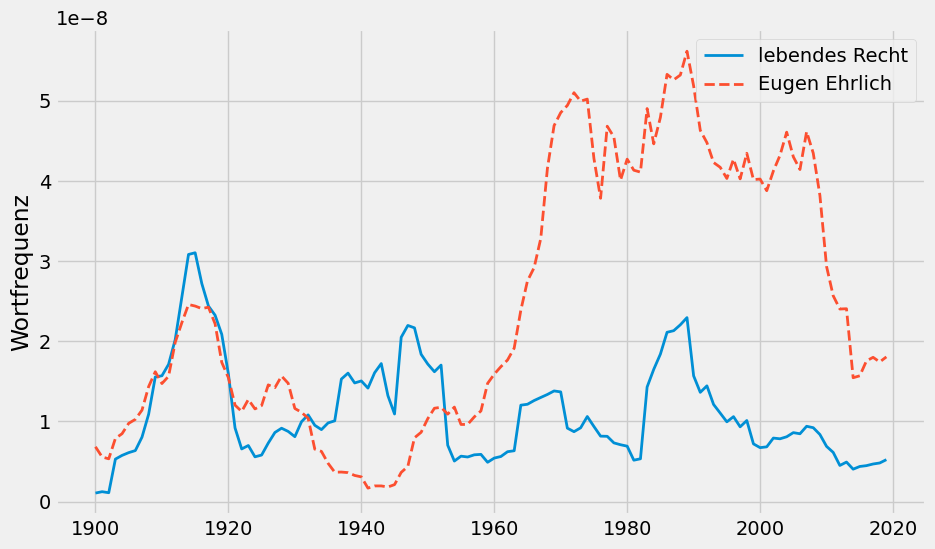

In [18]:
from lib.google_ngram import plot
plot(ylabel="Wortfrequenz",
     file='docs/19-google-ngram-de-lebendes-recht-ehrlich.png',
     content='lebendes Recht,Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='de-2019')

## Abbildung 20: „living law“ und „Eugen Ehrlich“ im Google-Books-Korpus „English (2019)“

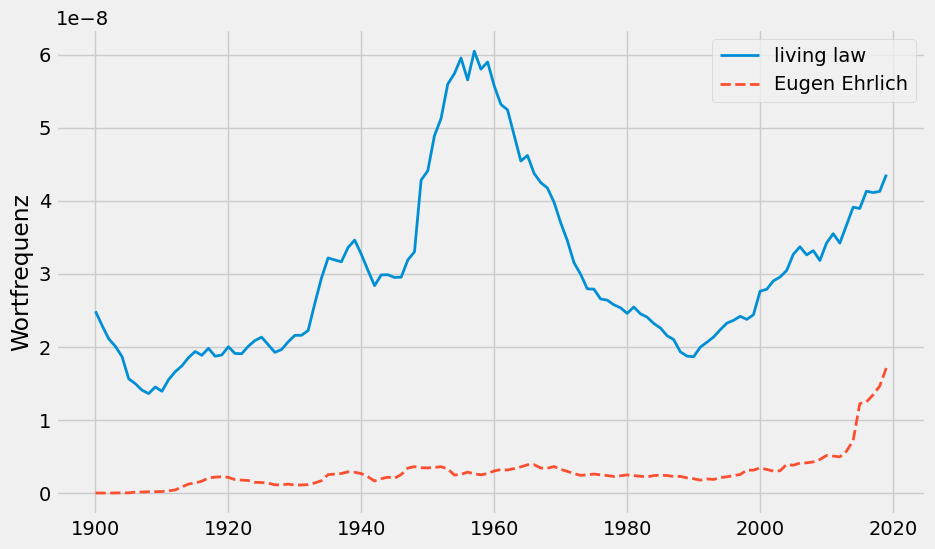

In [17]:
from lib.google_ngram import plot
plot(ylabel="Wortfrequenz",
     file='docs/20-google-ngram-en-living-law-ehrlich.png',
     content='living law,Eugen Ehrlich',
     year_start=1900, year_end=2019,
     case_insensitive=True,
     smoothing=3,
     corpus='en-2019')